Bottlenecks - constant/irregular 
*ignoring bus stop sections
Finding downtown vs suburbs bottlenecks
1st Quartile of each route for constant
*Delayed data

Focus on Inbound/Outbound

Time categories -
## 6am - 9am AM Peak
9am-230pm Off Peak
230pm-6pm PM Peak
6pm-6am Overnight
Day of Interest
Saturday
Sunday
Holidays*
## M/F
## Tues-Thurs
## date chunks:
01/25/2022 - 02/24/2022*
02/25/2022 - 03/26/2022*
03/27/2022 - 04/26/2022
04/27/2022 - 05/25/2022
05/26/2022 - 06/25/2022
06/26/2022 - 07/26/2022
* - note: exclude for this particular notebook because of route changes

##  excludeDates:
'01-17-2022, 02-18-2022, 03-14-2022, 03-15-2022, 03-26-2022, 03-17-20222, 03-18-2022, 04-14-2022, 04-25-2022, 05-30-2022, 07-04-2022'

## going to go ahead and group M-F together for this notebook

In [28]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import json
import numpy as np

%matplotlib inline

In [2]:
with open('../data/WeGo.json') as fi:
    credentials = json.load(fi)

In [3]:
Authorization = credentials['Authorization']

In [4]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/3'

headers = {'Authorization': Authorization,
          'Content-Type': 'application/json'}

In [5]:

#geosjson format paramater list

params_geo = [{
    'direction': '1',
    'startDate': '03-27-2022',
    'endDate' : '04-26-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'excludeDates' : '04-14-2022,04-25-2022',
    'daysOfWeek' : '1,2,3,4,5',
},

{
    'direction': '1',
    'startDate': '04-27-2022',
    'endDate' : '05-25-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    #'excludeDates' : '05-30-2022, 07-04-2022',
    'daysOfWeek' : '1,2,3,4,5',
},

{
    'direction': '1',
    'startDate': '05-26-2022',
    'endDate' : '06-25-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'excludeDates' : '05-30-2022',
    'daysOfWeek' : '1,2,3,4,5',
},

 {
    'direction': '1',
    'startDate': '06-26-2022',
    'endDate' : '07-26-2022',
    'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'excludeDates' : '07-04-2022',
    'daysOfWeek' : '1,2,3,4,5',
}

    ]

# non-hiRes paramater list for getting bus stops
params_norm = [{
    'direction': '1',
    'startDate': '03-27-2022',
    'endDate' : '04-26-2022',
   # 'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'excludeDates' : '04-14-2022,04-25-2022',
    'daysOfWeek' : '1,2,3,4,5',
},

 {
       'direction': '1',
    'startDate': '04-27-2022',
    'endDate' : '05-25-2022',
    #'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
   # 'excludeDates' : '04-25-2022, 05-30-2022, 07-04-2022',
    'daysOfWeek' : '1,2,3,4,5',
},

 {
    'direction': '1',
    'startDate': '05-26-2022',
    'endDate' : '06-25-2022',
   #'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'excludeDates' : '05-30-2022',
    'daysOfWeek' : '1,2,3,4,5',
},

 {
    'direction': '1',
    'startDate': '06-26-2022',
    'endDate' : '07-26-2022',
    #'resolution': 'hiRes',
    'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'excludeDates' : '07-04-2022',
    'daysOfWeek' : '1,2,3,4,5',
}
]


#json paramater list for getting count

params = [{
    'direction': '1',
    'startDate': '03-27-2022',
    'endDate' : '04-26-2022',
    'resolution': 'hiRes',
   # 'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'excludeDates' : '04-14-2022,04-25-2022',
    'daysOfWeek' : '1,2,3,4,5',
},

{
       'direction': '1',
    'startDate': '04-27-2022',
    'endDate' : '05-25-2022',
    'resolution': 'hiRes',
   # 'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    #'excludeDates' : '01-17-2022, 02-18-2022, 03-14-2022, 03-15-2022, 03-26-2022, 03-17-20222, 03-18-2022, 04-14-2022, 04-25-2022, 05-30-2022, 07-04-2022',
    'daysOfWeek' : '1,2,3,4,5',
},

{
    'direction': '1',
    'startDate': '05-26-2022',
    'endDate' : '06-25-2022',
    'resolution': 'hiRes',
   # 'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'excludeDates' : '05-30-2022',
    'daysOfWeek' : '1,2,3,4,5',
},

{
    'direction': '1',
    'startDate': '06-26-2022',
    'endDate' : '07-26-2022',
    'resolution': 'hiRes',
   # 'format' : 'geojson',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'excludeDates' : '07-04-2022',
    'daysOfWeek' : '1,2,3,4,5',
}
]

In [6]:
params

[{'direction': '1',
  'startDate': '03-27-2022',
  'endDate': '04-26-2022',
  'resolution': 'hiRes',
  'beginTime': '06:00',
  'endTime': '09:00',
  'excludeDates': '04-14-2022,04-25-2022',
  'daysOfWeek': '1,2,3,4,5'},
 {'direction': '1',
  'startDate': '04-27-2022',
  'endDate': '05-25-2022',
  'resolution': 'hiRes',
  'beginTime': '06:00',
  'endTime': '09:00',
  'daysOfWeek': '1,2,3,4,5'},
 {'direction': '1',
  'startDate': '05-26-2022',
  'endDate': '06-25-2022',
  'resolution': 'hiRes',
  'beginTime': '06:00',
  'endTime': '09:00',
  'excludeDates': '05-30-2022',
  'daysOfWeek': '1,2,3,4,5'},
 {'direction': '1',
  'startDate': '06-26-2022',
  'endDate': '07-26-2022',
  'resolution': 'hiRes',
  'beginTime': '06:00',
  'endTime': '09:00',
  'excludeDates': '07-04-2022',
  'daysOfWeek': '1,2,3,4,5'}]

In [7]:
dfsgeo = []
dfsnorm = []
dfs = []


for i in params_geo:
    response_geo = requests.get(URL, params = i, headers = headers)
    response_line_seg = response_geo.json()['features']
    r3geoparams = gpd.GeoDataFrame.from_features(response_line_seg)
    dfsgeo.append(r3geoparams)
    
for i in params_norm:
    response_norm = requests.get(URL, params = i, headers = headers)
    response_line_seg1 = response_geo.json()['features']
    r3normparams = gpd.GeoDataFrame.from_features(response_line_seg1)
    dfsnorm.append(r3normparams)
    
for i in params:
    response = requests.get(URL, params = i, headers = headers)
    response_line_seg2 = response.json()['data']['segments']
    r3params = pd.DataFrame.from_dict(response_line_seg2)
    dfs.append(r3params)

In [8]:
dfs[2]

,pathLocs,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent20Secs,percent10Secs,minSecs,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,toStop,fromStop,countForSegment
0,"[{'lat': 36.07396189205922, 'lon': -86.9238482...",2.809,1.952,1.798,1.714,1.5580,1.437,1.388,1.317,1.125,24.305,1.603669,15.155871,"{'configRev': 56, 'stopPathId': 'H70HICEN_to_H...","{'configRev': 56, 'stopPathId': 'H70COLEM_to_H...",163
1,"[{'lat': 36.14103841559591, 'lon': -86.8172203...",30.426,3.841,3.107,2.661,2.2785,1.992,1.842,1.700,0.962,24.265,2.638180,9.197629,"{'configRev': 56, 'stopPathId': 'WESACKEN_to_W...","{'configRev': 56, 'stopPathId': 'WES440EM_to_W...",328
2,"[{'lat': 36.073773825154284, 'lon': -86.931411...",1.875,1.586,1.523,1.463,1.3870,1.302,1.268,1.211,1.083,24.285,1.395233,17.405695,"{'configRev': 56, 'stopPathId': 'H70COLEM_to_H...","{'configRev': 56, 'stopPathId': 'COLBAUNF_to_H...",163
3,"[{'lat': 36.127818852088716, 'lon': -86.851750...",7.827,4.114,3.069,2.611,1.9700,1.678,1.539,1.376,0.978,24.853,2.357449,10.542328,"{'configRev': 56, 'stopPathId': 'WHIPOSSN_to_H...","{'configRev': 56, 'stopPathId': 'WBBTSN_to_WHI...",167
4,"[{'lat': 36.13446011439085, 'lon': -86.8255030...",76.700,36.997,5.017,3.711,2.3985,1.792,1.635,1.433,0.755,24.572,8.544822,2.875660,"{'configRev': 56, 'stopPathId': 'WESLEOEN_to_W...","{'configRev': 56, 'stopPathId': 'WESWILEN_to_W...",320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048,"[{'lat': 36.132637908964725, 'lon': -86.830462...",5.787,2.190,1.886,1.736,1.5790,1.441,1.358,1.283,1.020,23.956,1.683888,14.226599,"{'configRev': 56, 'stopPathId': 'WESWILEN_to_W...","{'configRev': 56, 'stopPathId': 'HARVINEN_to_W...",320
1049,"[{'lat': 36.13047262723422, 'lon': -86.8371404...",8.603,2.042,1.814,1.714,1.5680,1.441,1.367,1.289,1.045,23.901,1.662752,14.374363,"{'configRev': 56, 'stopPathId': 'HARVINEN_to_W...","{'configRev': 56, 'stopPathId': 'HARWOOEN_to_H...",326
1050,"[{'lat': 36.09626, 'lon': -86.87775}, {'lat': ...",7.363,1.606,1.441,1.367,1.2605,1.185,1.138,1.083,0.823,24.744,1.358675,18.211861,"{'configRev': 56, 'stopPathId': 'H70PEREN_to_H...","{'configRev': 56, 'stopPathId': 'H70BROE_to_H7...",166
1051,"[{'lat': 36.1493, 'lon': -86.85794}, {'lat': 3...",22.776,5.426,4.051,3.316,2.2890,1.705,1.380,0.789,0.388,24.651,2.897385,8.508017,"{'configRev': 56, 'stopPathId': 'WHICHASF_to_W...","{'configRev': 56, 'stopPathId': 'to_WHICHASF',...",91


## concat geo dfs with dfs to get count for each entry

In [9]:
len(dfsgeo)

4

In [10]:
aprilgeo = dfsgeo[0]
aprilcount = dfs[0]
maygeo = dfsgeo[1]
maycount = dfs[1]
junegeo = dfsgeo[2]
junecount = dfs[2]
julygeo = dfsgeo[3]
julycount = dfs[3]

r3april = pd.concat([aprilgeo, aprilcount[['percent20Secs', 'countForSegment']]], axis = 1)
r3may = pd.concat([maygeo, maycount[['percent20Secs', 'countForSegment']]], axis = 1)
r3june = pd.concat([junegeo, junecount[['percent20Secs', 'countForSegment']]], axis = 1)
r3july = pd.concat([julygeo, julycount[['percent20Secs', 'countForSegment']]], axis=1)

<AxesSubplot:>

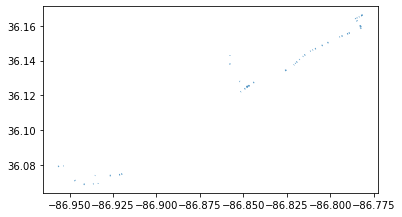

In [11]:
r3june[r3june['averageTravelSeconds'] > 6].plot()

##  Filter for 'countForSegment' > n in the tables to get null values out
have to take lower counts out of it skews the data. averageTravelSpeed for a 25m segment should never be 0

In [17]:
r3april = r3april[r3april['countForSegment'] > 25]
r3may = r3may[r3may['countForSegment'] > 25]
r3june = r3june[r3june['countForSegment'] > 25]
r3july = r3july[r3july['countForSegment'] > 25]


In [21]:
r3july.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,percent20Secs,countForSegment
count,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000
mean,24.332565,3.048366,11.825226,25.503885,5.381286,3.758263,3.017309,2.272867,1.831073,1.463293,1.058344,1.633572,200.103908
std,0.519061,7.273692,4.760210,52.591677,14.945151,12.010434,10.503793,7.798496,3.725866,0.503741,0.328126,1.188123,75.296929
min,22.108000,1.187962,0.108295,1.756000,1.416000,1.301000,1.227000,1.141000,1.075000,0.801000,0.620000,1.034000,51.000000
25%,24.078000,1.583500,8.571707,3.611000,1.921000,1.737000,1.621000,1.468000,1.357000,1.190000,0.778000,1.299000,155.000000
50%,24.470000,2.027146,12.038623,6.541000,2.717000,2.243000,1.994000,1.759000,1.575000,1.378000,1.042000,1.488000,157.000000
75%,24.723000,2.866627,15.382059,22.234000,4.464000,3.257000,2.760000,2.214500,1.880000,1.599000,1.247000,1.746000,305.000000
max,24.998000,218.633647,20.598302,529.319000,407.706000,358.223000,325.760000,251.535000,120.361000,10.340000,4.048000,35.817000,318.000000


##  bottom 20% of percent20Secs for each month

<AxesSubplot:>

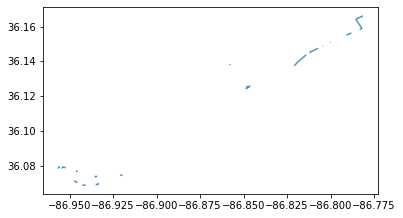

In [33]:
r3aprilb20 = r3april[r3april['percent20Secs'] > np.quantile(r3april['percent20Secs'], .80)]
r3aprilb20.plot()

<AxesSubplot:>

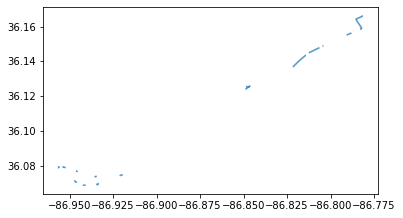

In [35]:
r3mayb20 = r3may[r3may['percent20Secs'] > np.quantile(r3may['percent20Secs'], .80)]
r3mayb20.plot()

<AxesSubplot:>

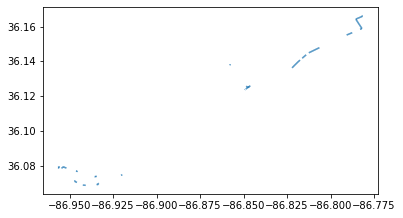

In [36]:
r3juneb20 = r3june[r3june['percent20Secs'] > np.quantile(r3june['percent20Secs'], .80)]
r3juneb20.plot()

<AxesSubplot:>

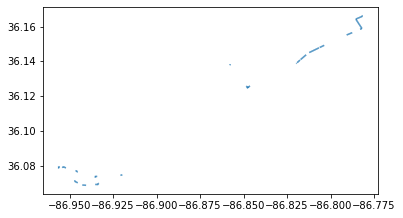

In [37]:
r3julyb20 = r3july[r3july['percent20Secs'] > np.quantile(r3july['percent20Secs'], .80)]
r3julyb20.plot()